<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

#### Importing the data and selecting the dependent and independent variable

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Datasets/Car Price Prediction/cleaned-data.csv')

In [5]:
df.head(4)

,Power,Price,Engine,Mileage,Year,Fuel_Type,Kilometers_Driven,Seats,New_Price
0,0.104386,0.049774,0.096339,0.387597,2011,2,0.211754,5.0,0.058743
1,0.346491,0.285068,0.471098,0.241929,2016,1,0.165112,8.0,0.213598
2,0.146930,0.148416,0.159682,0.459153,2018,2,0.117034,5.0,0.084239
3,0.358363,0.239819,0.404143,0.287503,2014,1,0.510261,7.0,0.351206


<Axes: >

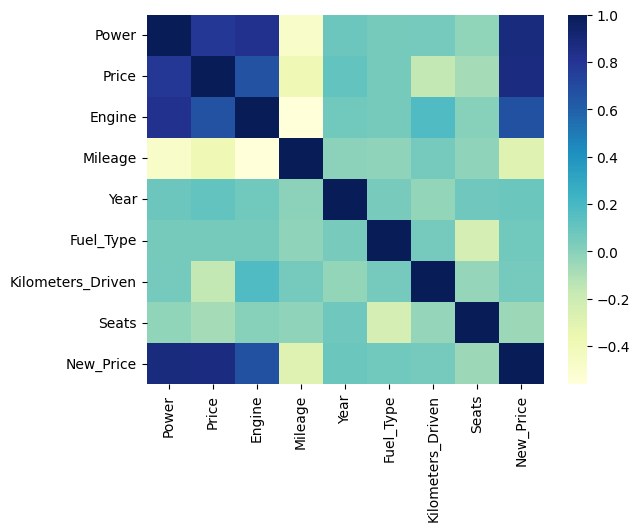

In [6]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='YlGnBu')

In [7]:
# because corr b/w old price and new price is high we will try to find a formula b/w them that corresponds to best line
simple_reg_df = df[['Price', 'New_Price']]
simple_reg_df.head(3)

,Price,New_Price
0,0.049774,0.058743
1,0.285068,0.213598
2,0.148416,0.084239


In [9]:
X = simple_reg_df['Price']
y = simple_reg_df['New_Price']

<Axes: xlabel='Price', ylabel='New_Price'>

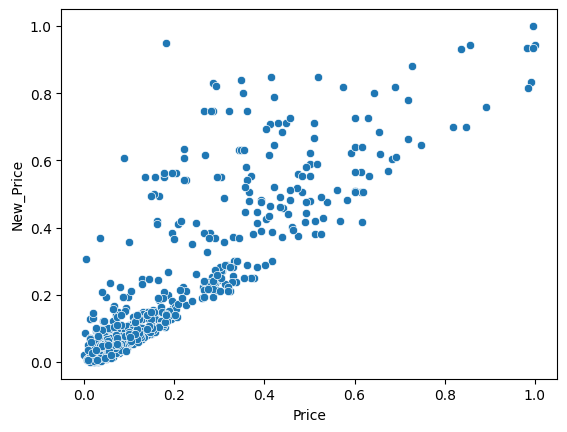

In [10]:
sns.scatterplot(y=y, x=X)

#### Splitting data to train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=11)

# test_size -> 0 to 1, it means how much % of data to be in test. eg- 0.4 means 40% of data will be used as test
# random_state helps us get random rows rather than top/bottom rows

convert X data (Both test and train) to format of 2d array than 1d array for sk learn lib to work on it

In [12]:
import numpy as np
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

#### Building and Training the SLR model

In [13]:
# first import the model
from sklearn.linear_model import LinearRegression

# second create object of the model
lr = LinearRegression()

# last, fit the training data to the object of model. Fitting it is itself training the model
# Thus, by fitting itslef we find the best equation for the training data
lr.fit(X_train, y_train)

LinearRegression()

our model is ready now, check if it has got the best line for training data which it was made for

In [15]:
# you dont have to write the equation by getting parameters as below, you can directly use .predict as shown in next step
print(lr.coef_)
print(lr.intercept_)

[1.02851728]
0.005385955658150671


In [16]:
y_pred_train = lr.predict(X_train) # get prediction for training data to check in graph

Text(0.5, 0, 'New Price')

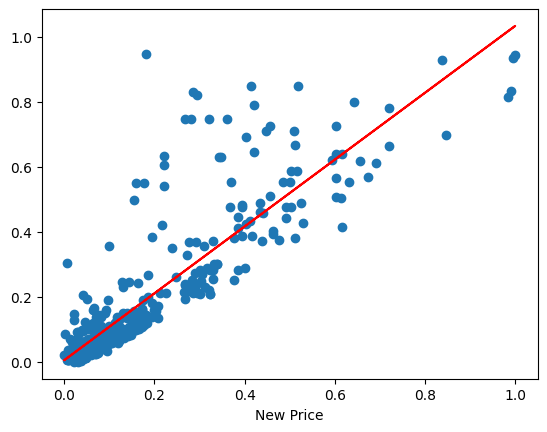

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train, color="red")
plt.xlabel("Old Price")
plt.xlabel("New Price")

hence we have completed training our model and plotted graph to check if best line was actually found

#### Now we test using the test data and check if it is goodly comparable with test y

the reason why this works is because, the model is unaware of test data i.e. it has never seen it before thus, if it produces good results we can confirm that it works fine

In [23]:
y_pred_test = lr.predict(X_test)

Text(0.5, 0, 'New Prices')

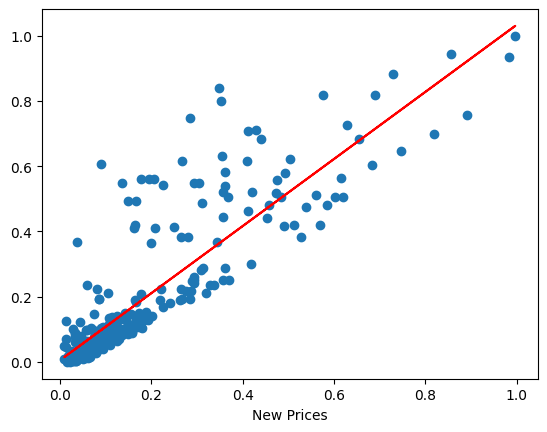

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color="red")
plt.xlabel("Old Prices")
plt.xlabel("New Prices")

the line kinda good w.r.t data it has never seen before

#### Using r2 method to validate

r2_score = (0 to 1)

0 = trash model

1 = perfect model

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_train, y_pred_train)

0.753357296527631

In [32]:
r2_score(y_test, y_pred_test)

0.7510085017459261

# Multiple Linear Regression

#### Splitting data set

In [33]:
# first we get the df
df.head(3)

,Power,Price,Engine,Mileage,Year,Fuel_Type,Kilometers_Driven,Seats,New_Price
0,0.104386,0.049774,0.096339,0.387597,2011,2,0.211754,5.0,0.058743
1,0.346491,0.285068,0.471098,0.241929,2016,1,0.165112,8.0,0.213598
2,0.146930,0.148416,0.159682,0.459153,2018,2,0.117034,5.0,0.084239


In [34]:
X = df.drop(columns=['New_Price'])
y = df['New_Price']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Building the model

In [36]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [37]:
mlr.coef_

array([ 1.12642355e+00,  5.88791415e-01, -3.33558951e-01,  2.48916410e-01,
       -1.86526102e-04,  1.21584388e-02,  1.91946736e-01,  2.41962455e-03])

In [39]:
mlr.intercept_

0.14805869871505106

In [40]:
y_pred_train = mlr.predict(X_train)

<Axes: ylabel='New_Price'>

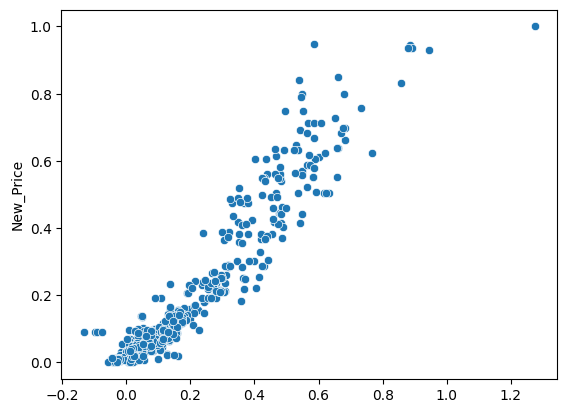

In [42]:
sns.scatterplot(x=y_pred_train, y=y_train)

#### Testing with test data

In [43]:
y_pred_test = mlr.predict(X_test)

<Axes: ylabel='New_Price'>

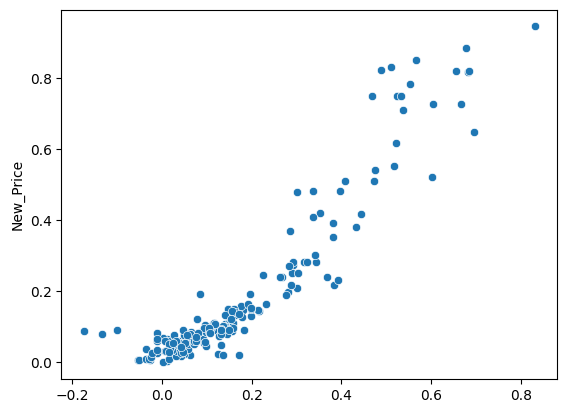

In [44]:
sns.scatterplot(x=y_pred_test, y=y_test)

#### R2 test on both

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_train, y_pred_train)

0.9047249728723591

In [48]:
r2_score(y_test, y_pred_test)

0.858895260166929